In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print("x_train shape: ", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28)


In [ ]:
#since the data is in 2D, We need to convert it to 3D since that is the format required by the CNN layer

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape: ", x_train.shape)

x_train shape:  (60000, 28, 28, 1)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!

model.compile(optimizer='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 21s 5ms/step - loss: 0.5255 - accuracy: 0.8075 - val_loss: 0.4032 - val_accuracy: 0.8513
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3619 - accuracy: 0.8659 - val_loss: 0.4116 - val_accuracy: 0.8395
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3129 - accuracy: 0.8821 - val_loss: 0.3261 - val_accuracy: 0.8795
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2764 - accuracy: 0.8953 - val_loss: 0.3026 - val_accuracy: 0.8899
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2506 - accuracy: 0.9064 - val_loss: 0.2928 - val_accuracy: 0.8969
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2284 - accuracy: 0.9139 - val_loss: 0.2891 - val_accuracy: 0.8925
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2100 - accuracy: 0.9201 - val_loss: 0.2837 - val_accuracy

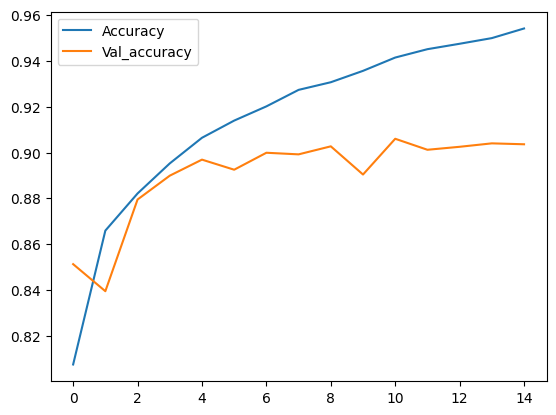

In [ ]:
#ploting the accuracy

plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_accuracy')
plt.legend()

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[866   1  14  20   3   2  82   0  12   0]
 [  6 973   0  13   4   0   3   0   1   0]
 [ 17   1 837   8  57   0  76   0   4   0]
 [ 18   4  13 904  31   2  27   0   1   0]
 [  3   1  47  20 847   0  81   0   1   0]
 [  0   0   0   2   0 974   0  15   1   8]
 [120   1  53  21  62   0 729   0  14   0]
 [  0   0   0   0   0  21   0 960   0  19]
 [  3   2   0   2   2   2   4   2 983   0]
 [  1   0   0   0   0   9   0  27   0 963]]


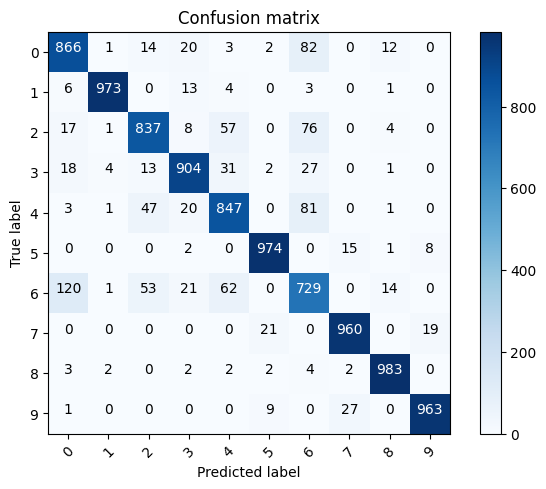

In [ ]:
#plotting confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

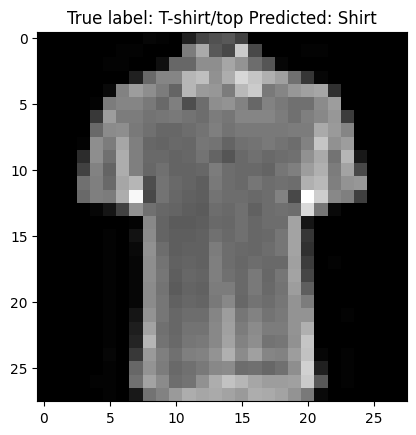

In [ ]:
# Showing some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

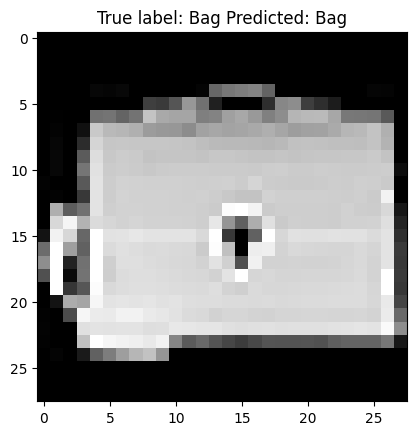

In [ ]:
# Showing some classified examples

classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));